In [1]:
import pandas as pd
movies = pd.read_csv("fandango_score_comparison.csv")
print(movies.shape)
print(movies.head())

(146, 22)
                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

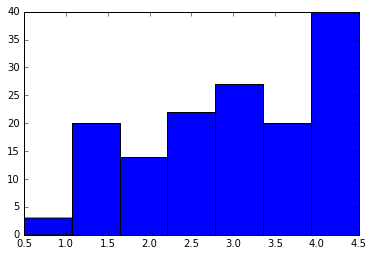

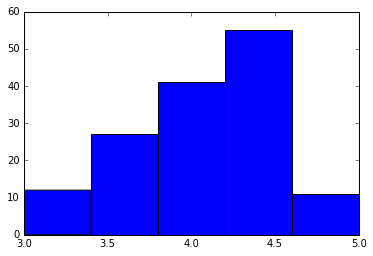

In [3]:
plt.hist(movies['Metacritic_norm_round'],7)
plt.show()
plt.hist(movies['Fandango_Stars'],5)
plt.show()


Metacritic reviews histogram seems to be more spread than the fandango score reviews, therefore more likely to have a bigger standard deviation. Majority of scores for both sites are higher than 4, result that might show a bias for the sites to give high movie scores.

In [4]:
import numpy
mean_fand = movies['Fandango_Stars'].mean()
mean_Metac = movies['Metacritic_norm_round'].mean()
med_fand = numpy.median(movies['Fandango_Stars'])
med_Metac = numpy.median(movies['Metacritic_norm_round'])
std_fand = numpy.std(movies['Fandango_Stars'])
std_Metac = numpy.std(movies['Metacritic_norm_round'])
print('mean fandango:', mean_fand)
print('mean Metacritic:', mean_Metac)
print('median fandango:', med_fand)
print('median Metacritic:', med_Metac)
print('standard dev fandango:', std_fand)
print('standard dev Metacritic:', std_Metac)



mean fandango: 4.08904109589
mean Metacritic: 2.97260273973
median fandango: 4.0
median Metacritic: 3.0
standard dev fandango: 0.53853216127
standard dev Metacritic: 0.987561029704


The fact that Fandango rounds scores up and that they sell movie tickets, makes one wonder how ethical the reviews are. Metacritic on the other hand, clearly explains the methodology they use to score movies closing the doors to any misjudgement.

The mean is higher than the median for the Fandango reviews as majority of reviews aree higher than 4 but the reviews fall within the range of 3 and 5.  In regards to Metacritic reviews, the range of scores is wider than the one from Fandango, 0.5 to 4.5, and scores are more evenly spread although majority of scores fall under 4 and 4.5.  This explains why the Metacritic Median and the mean are lower.

The standard deviation for Fandango is much lower than the one for Metacritic as the scores fall under a much smaller range and majority of scores are higher than 4.

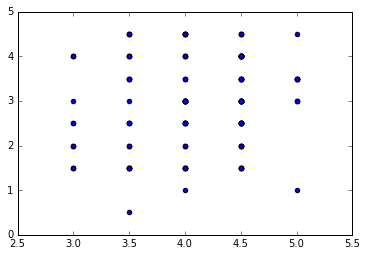

In [5]:
plt.scatter(movies['Fandango_Stars'],movies['Metacritic_norm_round'])
plt.show()

In [13]:
movies['fm_diff'] = movies['Fandango_Stars'] - movies['Metacritic_norm_round']
movies['fm_diff'] = abs(movies['fm_diff'])
#print(movies['fm_diff'])
movies.sort_values("fm_diff", ascending=False).head(5)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [15]:
from scipy.stats import pearsonr, linregress
r, p_value = pearsonr(movies['Metacritic_norm_round'],movies['Fandango_Stars'])
print(r)

0.178449190739


The correlation between Fandango and Metacritic review columns is very low, meaning that the relationship between both variables is almost non-existent. The reviews on one website do not match or behave the same way as the ones in the other website.

In [18]:
slope, intercept, r_value, p_value, stderr_slope  = linregress(movies['Metacritic_norm_round'],movies['Fandango_Stars'])
print(slope,intercept)
pred_3 = slope*3 + intercept
print(pred_3)

0.0973110779739 3.7997739189
4.09170715282


In [19]:
pred_1 = slope*1 + intercept
print(pred_1)
pred_5 = slope*5 + intercept
print(pred_5)

3.89708499687
4.28632930877


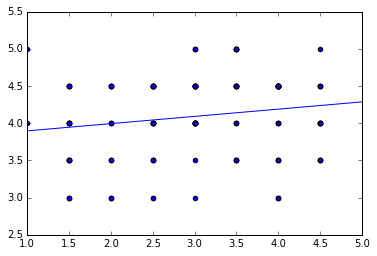

In [21]:
plt.scatter(movies['Metacritic_norm_round'],movies['Fandango_Stars'])
x = [1.0 , 5.0]
y = [pred_1 , pred_5]
plt.plot(x,y)
plt.xlim(1,5)
plt.show()